<div class="alert alert-block alert-danger">

## 4A: Can parasites control their hosts? (COMPLETE)

**Lesson assumes students have read up through page: 4.4**
    
</div>

<img src="https://images.newscientist.com/wp-content/uploads/2017/05/04161216/fig.-3_metacercariae_ns.jpg" width=300>

The eye fluke; a parasite that infects fish and lives in their eyes.

<div class="alert alert-block alert-success">

## Approximate time to complete Notebook: 55-70 Mins
    
</div>

In [39]:
# This code will load the R packages we will use

suppressPackageStartupMessages({
    library(coursekata)
})

exp1 <- read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT0BJOSII2SFORMbCO9pnXZKCwMzjnBhcHD0QCziE1qbQJcsJz1wjHg3fTLYXfpiA9MICNV5S1IceDf/pub?gid=974536451&single=true&output=csv")
exp2 <- read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSIrbyNRhOUYD_4nn4xOtQ0tJjNaIn7X4RaqQTG9Zc5Vr3mreonLC4_lbt1FdWgvkW_pRJSvOxDjhNp/pub?gid=636600208&single=true&output=csv")

exp1$infected <- factor(exp1$infected)

<div class="alert alert-block alert-success">

### 1.0 - Approximate Time: 5-8 mins
    
</div>

### Intro: The Eye Fluke

Although animals typically survive by avoiding predators, this is a problem for parasites who need their hosts to be eaten in order to continue their life cycle.

Take, for instance, the common parasite, the eye fluke (*Diplostomum pseudospathaceum*), which has a life cycle that takes place in three different types of animals.

<img src="https://i.postimg.cc/x0RhFXQq/image.png" alt="life cycle of eye fluke" width=600>

The eye fluke would really like it if the trout would get eaten by a bird (even if the trout wouldn't!).

Dr. Mikhail Gopko and colleagues conducted an experiment to see if parasite-infected trout would change their behavior in a way that would make them more likely to be eaten by birds (e.g., swim closer to the surface of the water).

## 1.0: The Data

The data frame `exp1` contains data from this published study (https://link.springer.com/article/10.1007/s00265-017-2300-x). 46 lab-raised trout were randomly assigned to be either infected by eye fluke or not. 

- `infected` whether fish is in experimentally infected (1) or control (0) group
- `fish_id` an identification number
- `fish_mass_g` mass of fish in grams
- `infection_intensity` number of eye flukes in fish eye lense
- `depth` mean distance from bottom of aquarium measured in cm (larger numbers indicated shallower swimming--that is, closer to the surface)
- `activity` number of gridlines crossed by fish in a 4 minute period  

In [40]:
# Take a look at the data frame
str(exp1)

'data.frame':	46 obs. of  6 variables:
 $ infected           : Factor w/ 2 levels "0","1": 1 1 1 2 2 2 1 1 1 1 ...
 $ fish_id            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ fish_mass_g        : num  4.8 8.3 9.2 9.3 9.5 6.3 9.5 10.7 8.4 9.3 ...
 $ infection_intensity: int  0 0 0 9 26 24 0 0 0 0 ...
 $ depth              : num  14.8 24.9 11.9 17.8 26.4 ...
 $ activity           : int  113 2 43 97 24 91 0 9 17 7 ...


**1.1:** If parasites indeed change their fishy hosts' behaviors, which of the variables above might be interesting outcomes to consider?

<div class="alert alert-block alert-warning">

**Sample Responses**

Variables such as `depth` and `activity` are relevant outcomes to the current research question, but other variables may interesting as well, such as `fish_mass_g`. 

Students may also identify `infected` and `infection_intensity` as explanatory variables.

    
</div>

**1.2:** Write a word equation to represent the researchers' hypothesis. 

<div class="alert alert-block alert-warning">

**Note for Instructors**

We can potentially use both depth and activity; both have similar patterns but we'll focus on depth because it might be easier to understand how parasites might benefit from this behavior change.

**Sample Response**

DEPTH = INFECTED + ERROR
    
</div>

<div class="alert alert-block alert-success">

### 2.0 - Approximate Time: 8-10 mins
    
</div>

## 2.0: Explore Variation

**2.1, Discussion:** Here is a visualization to help us explore this hypothesis. What do you think of this hypothesis from the data that you see?

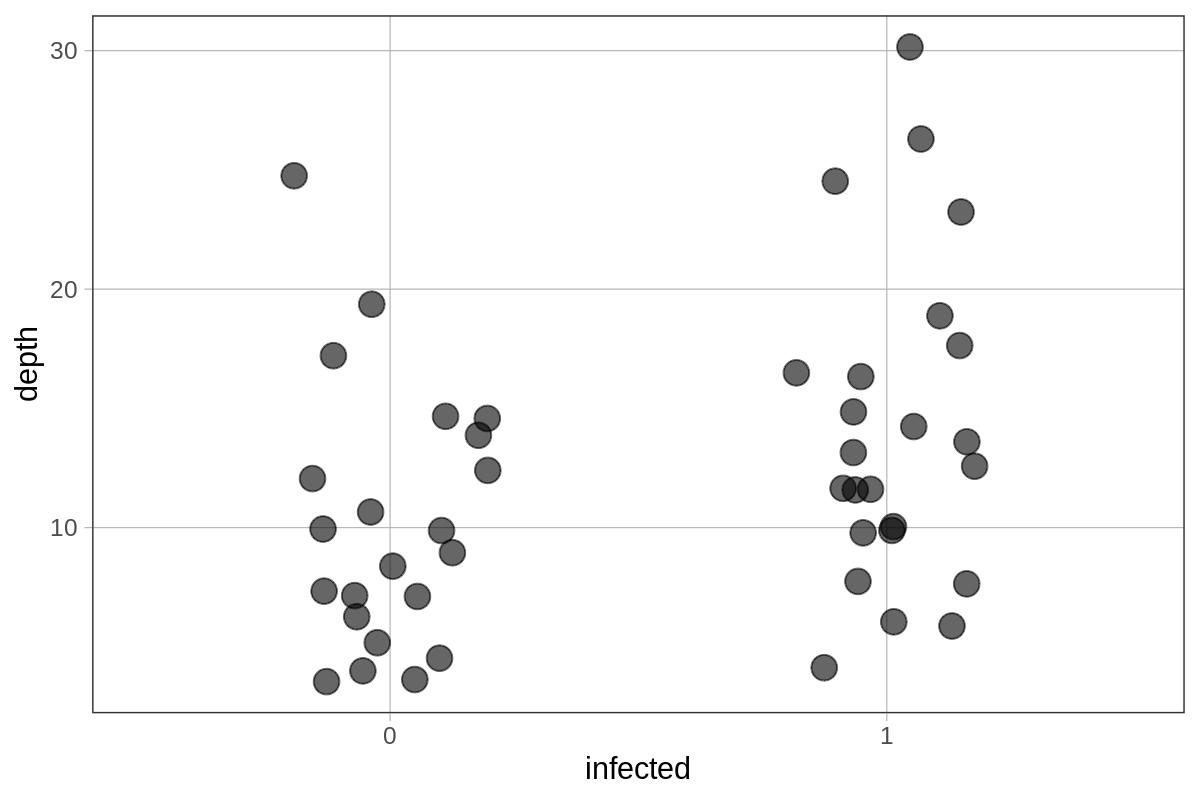

In [41]:
gf_jitter(depth ~ infected, data = exp1, width = .2, height = .2, size = 4) 

<div class="alert alert-block alert-warning">

**Sample Responses**

- Some students may see pretty similar distributions, and may disregard the points that look like outliers to them.
- Some students may try to identify the approximate mean or center of the two distributions and see that the infected group seems to have a higher mean.
- Some may notice there are more clumped near 0 for the control group, while the infected group has more of the higher values.
- May be helpful to chain on `gf_boxplot()`
    
</div>

**2.2, Discussion:** Find this fish in the visualization above (we'll call it fish #3).

In [42]:
filter(exp1, fish_id == 3)

infected,fish_id,fish_mass_g,infection_intensity,depth,activity
<fct>,<int>,<dbl>,<int>,<dbl>,<int>
0,3,9.2,0,11.9,43


<div class="alert alert-block alert-warning">

**Note to Instructors**

This requires students to identify key information from fish #3: `infected` = 0; `depth` = 11.9. They also need to use this information to identify which group the fish is in and then finding the dot around 12. 

After they have tried to identify fish #3, you can use the code below to "color" in fish #3.

</div>

In [43]:
# a visualization that will color fish #3's dot in a different color
# gf_jitter(depth ~ infected, data = exp1, width = .2, height = .2, size = 4, color = ~fish_id == 3) 

**2.3:** Could we have gotten a distribution of data like this if parasites didn't really affect swimming in the Data Generating Process? How would we represent that as the word equation? 

(Could we try it in R somehow?)

<div class="alert alert-block alert-warning">

**Sample Response**

Yes, we could have gotten this distribution from a DGP where the parasites are not actually affecting swimming behavior, because one DGP can produce lots of different samples. 

depth = mean + error

We can simulate this in R using the `shuffle()` function.

**Note to Instructors**

You might want to write both word equations somewhere (e.g. on the board) so that students can keep in mind that we are comparing models (the complex versus empty).
    
</div>

In [44]:
# modify this code to mimic a no-effect-of-parasites DGP
#gf_jitter(depth ~ infected, data = exp1, width = .2, height = .2, size = 4, color = ~fish_id == 3) 


# COMPLETE VERSION - add shuffle() to one of the variables
# gf_jitter(shuffle(depth) ~ infected, data = exp1, width = .2, height = .2, size = 4, color = ~fish_id == 3) 

**2.4, Discussion:** If eye flukes don't change their host's behavior, would fish #3 have acted differently even if it was infected? 

<div class="alert alert-block alert-warning">

**Sample Response**

If they do not affect the trout's behavior then the fish should not have acted differently (it would have still swam at the same depth). This is what it means to have "no effect" (aka $\beta_1=0$).

**Note for Instructors**

After discussing, run the simulation below a few times. This simulation mimics a world where there is no effect of being infected. Ask, "in this DGP, when fish #3 is uninfected, what depth does it swim at? how about when infected?" Thus, `shuffle()` mimics the DGP that eye flukes don't change their host's behavior.
    


</div>

In [45]:
#gf_jitter(shuffle(depth) ~ infected, data = exp1, width = .2, height = .2, size = 4, color = ~fish_id == 3) 

<div class="alert alert-block alert-success">

### 3.0 - Approximate Time: 8-10 mins
    
</div>

## 3.0: Model Variation in the Sample

**3.1:** What's the best fitting model of the data based on the researchers' hypothesis? 

Specify and fit a formal model (in GLM format). 

$Y_i = ... + e_i$

In [46]:
# COMPLETE VERSION
fluke_model <- lm(depth ~ infected, data = exp1)
fluke_model


Call:
lm(formula = depth ~ infected, data = exp1)

Coefficients:
(Intercept)    infected1  
     10.265        3.827  


<div class="alert alert-block alert-warning">

**Sample Response**

$depth = 10.27 + 3.83(infected) + e_i$
    
</div>

**3.2:** Interpret the best fitting estimates in that model  by connecting it to the visualization below.

- $b_0$: 
- $b_1$:

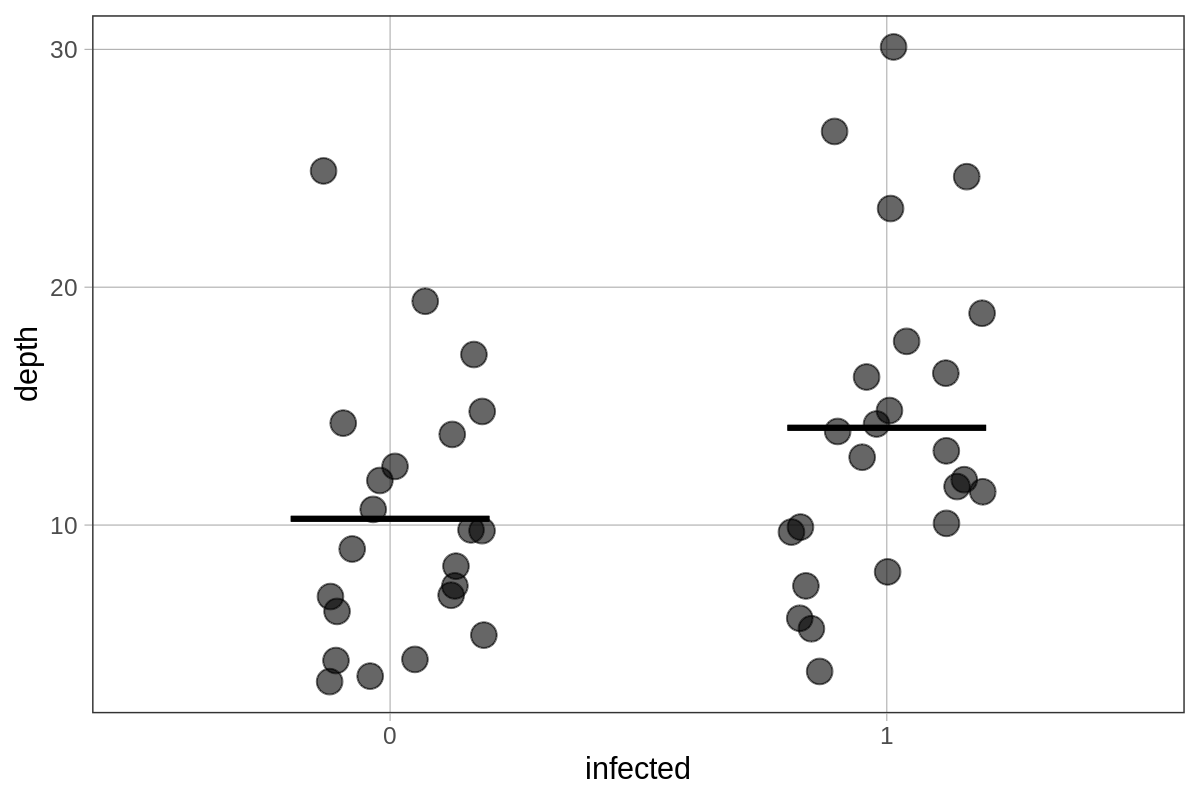

In [47]:
gf_jitter(depth ~ infected, data = exp1, width = .2, height = .2, size = 4) %>%
gf_model(depth ~ infected, data = exp1)

<div class="alert alert-block alert-warning">

**Sample Response**

- $b_0$: The average `depth` of the non-infected group (the mean line for group `0` in the plot).
- $b_1$: The amount of `depth` added to $b_0$ to get the mean `depth` of the infected group (the distance, or increment, between the mean line for group `0` and the mean line for group `1`).

    
</div>

<div class="alert alert-block alert-success">

### 4.0 - Approximate Time: 10-12 mins
    
</div>

## 4.0: But what's the best model of the DGP?

**4.1a:** Is it possible that there is no difference between these two groups in the DGP? If so, how would we represent that hypothesis in GLM notation? 

<div class="alert alert-block alert-warning">

**Sample Response**

Yes, it is possible, and in that case we can just use the grand mean as our prediction, regardless of `infected`.

DEPTH = MEAN + ERROR

$depth = \beta_0 + \epsilon_i$

(Some students may think it is $depth = b_0 + e_i$ but this equation represents the empty model fit to the sample -- not the DGP's model.)
    
</div>

**4.1b:** Is it possible that the researchers are right and infected fish really are different from uninfected fish in the DGP? If so, how would we represent that hypothesis in GLM notation? 

<div class="alert alert-block alert-warning">

**Sample Response**

DEPTH = INFECTED + ERROR

$depth = \beta_0 +\beta_1(infected) + e_i$

$depth = 10.27 + 3.83(infected) + \epsilon_i$

    
</div>

**4.2:** What is our best guess for the $\beta_1$ in the two equations above? What would happen to the 2nd model if $\beta_1 = 0$? 

<div class="alert alert-block alert-warning">

**Sample Response**

Our best guess for the true $\beta_1$ in the DGP is our sample $b_1$ of 3.83.

The 2nd model would become equivalent to the first model (the empty model).

**Note to Instructors:** 

This may feel tricky since the empty model (4.1a) doesn't have an explicit $\beta_1$. It may be helpful to discuss why $\beta_1=0$ is mathematically equivalent to leaving it out of the model.

</div>

**4.3:** Could the $\beta_1$ in the DGP be a different number than either of the two numbers above? What else could it be? 

<div class="alert alert-block alert-warning">

**Sample Response**

The $\beta_1$ could be an infinite number of values between zero and the max depth of the aquarium (on the positive or negative side). It could be the same as our sample, but it could also be 4.83, or -2.12854, or 0, or....

**Note to Instructors**

It might be helpful to show on the graph and discuss what different $\beta_1$s could look like and what they would mean (e.g., if $b_1$ were a positive or negative value, or if it were zero?). The graph can also help them figure out what the reasonable limit for the most extreme $b_1$ could be (i.e., there is a limited amount of depth in an aquarium so the $b_1$ should not exceed that).

</div>

<div class="alert alert-block alert-success">

### 5.0 - Approximate Time: 12-15 mins
    
</div>

## 5.0: Simulating a DGP where there is no effect of parasite

We can simulate a DGP with a certain $\beta_1$ (such as $\beta_1 = 0$, no effect of parasite infection) and look at all the $b_1$s that it can produce. Then we can ask: Does our sample seem "unlikely" to have come from this DGP? If so, then we might reject the empty model of the DGP.

**5.1:** What kind of world does `shuffle()` mimic? Represent the shuffle DGP using GLM notation: $Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$

<div class="alert alert-block alert-warning">

**Sample Response**

This question is just to revisit the idea from 4.1a. A way to check who is still having trouble with the idea of $\beta_1=0$. 

It mimics a world where there is no effect of the eye fluke on the trout's depth.

$Y_i = \beta_0 + 0*X_i + \epsilon_i$
    
</div>

**5.2a:** Run the code below a few times. Why does only one of the numbers change? 

In [48]:
sample_b1 <- b1(depth ~ infected, data = exp1)
sample_b1

b1(shuffle(depth) ~ infected, data = exp1)

[1] 3.826705

[1] -0.4849242

<div class="alert alert-block alert-warning">

**Sample Response**

The first number is our sample $b_1$ and since our sample doesn't change, it stays the same.

The second number changes because the `shuffle()` function mimics "no effect of infection" and fish are randomly put into the `infected` groups. Each time we get a different $b_1$ (based on this random DGP).

    
</div>

**5.2b:** What does the shuffled `b1` mean?

In [49]:
# COMPLETE VERSION
# if you want to show plot with shuffled data to show what a shuffled b1 means 

exp1$shuff_inf <- shuffle(exp1$infected)
shuff_model <- lm(depth ~ shuff_inf, data = exp1)

gf_jitter(depth ~ shuff_inf, data = exp1, width = .2, color = "orange", height = .2, alpha = .5, size = 4) %>%
gf_model(shuff_model, color = "black") 

print("the shuffled b1 is:")
print(b1(shuff_model))

<div class="alert alert-block alert-warning">

**Sample Response**

The shuffled $b_1$ means that is the difference between group means that we would expect if `infected` had nothing to do with `depth`.
    
</div>

**5.3:** Which of the following are shuffled data? Which one is the real data?

(Also, eyeball the values of the shuffled `b1`s. How are they different from the sample `b1`?)

<img src="https://i.postimg.cc/9mndF9qP/image.png" alt="a 3x3 panel of 8 shuffled data and one real data">

<div class="alert alert-block alert-warning">

**Sample Response**

Most of the shuffled b1s look pretty close to zero (not much of a difference between the two mean lines). Except for maybe the first one (first row, first column); it appears to show the opposite pattern of our sample data.

Plot F, in the third column and second row is the real data. Note that this `b1` is much bigger (more extreme) than the others.

</div>

**5.4:** Here is code for a single shuffled $b_1$. Try creating a sampling distribution of 1000 shuffled $b_1$s. 

In [ ]:
b1(shuffle(depth) ~ infected, data = exp1)

# COMPLETE VERSION
# Add the do()* function and save it into a data frame
sdob1 <- do(1000) * b1(shuffle(depth) ~ infected, data = exp1)
head(sdob1)

**5.5:** Make a visualization of the sampling distribution of $b_1$ you created. What's the shape, center, spread of this distribution?

<div class="alert alert-block alert-warning">

**Sample Response**

The shape is normal, with a center around 0, and a spread that ranges from about -6 to 6.
    
</div>

In [ ]:
# COMPLETE VERSION

sdob1 <- do(1000) * b1(shuffle(depth) ~ infected, data = exp1)
gf_histogram(~b1, data = sdob1, bins=100) 

# version of sdob1 with middle 95% of samples filled in
gf_histogram(~b1, data = sdob1, fill = ~middle(b1, .95), bins=100, show.legend = FALSE) 

<div class="alert alert-block alert-success">

### 6.0 - Approximate Time: 12-15 mins
    
</div>

## 6.0: Bringing in our sample

**6.1:** Where does our sample fall relative to this sampling distribution? Is it one of the "unlikely" samples?

<div class="alert alert-block alert-warning">

**Sample Response**

This may be hard to tell at first because the point falls right along the border of the "unlikely" samples. 

Students may want a more certain way of figuring this out. If they want to know for sure, encourage them to figure out a way where they can check if this sample `b1` is in the outer .05 of samples (e.g., using `tally()`). You can also tell them that they already know a function that will calculate the probability of getting this sample or more extreme (the `supernova()` function.

You may also want to run the simulation a few times. Sometimes, due to random chance, the point falls more clearly in the unlikely area.
 
</div>

In [ ]:
sdob1 <- do(1000) * b1(shuffle(depth) ~ infected, data = exp1)

# COMPLETE VERSION
# Add gf_point()
gf_histogram(~b1, data = sdob1, fill = ~middle(b1, .95), bins=100) %>%
gf_point(0 ~ sample_b1, color = "black")

Let's recap what all this means using our [distribution triad diagram](https://docs.google.com/presentation/d/1PTEFZGFKLX6mDa3GeceXkkmFTNEOOy2k1K6Tg3InVas/copy)

We started off thinking, "Maybe there is no effect of parasites on swimming behavior. Fish are going to swim at the same depth whether they are infected or not." We call that the empty model (so $\beta_1=0$). This is what we simulated when we did all these shuffles.

But our real sample is an unlikely $b_1$ from the empty model of the DGP.

(Fill in the $\beta_1$ and $b_1$ values on the diagram and move the distributions around accordingly.)

<div class="alert alert-block alert-warning">

**Note to Instructors**

Students should adjust the values for $\beta_1$ and $b_1$ and slide the distribution side-to-side to see which $\beta_1$s could still likely produce our sample. That is, how high or low could $\beta_1$ move until our sample $b_1$ becomes "unlikely"?
    
</div>

**6.2:** So what do you think about the empty model as a possible model of the DGP?

<div class="alert alert-block alert-warning">

**Sample Response**

This sample is unlikely to come from the empty model of the DGP. So it does not seem to be the model that generated this sample.
    
</div>

**6.3:** Going back to the researchers, what does this mean for their hypothesis? 

<div class="alert alert-block alert-warning">

**Sample Response**

It means that fish that are infected are different than uninfected. They tend to swim closer to the surface (more extreme than expected by random chance), making them more vulnerable to hungry birds, and thus, making it more likely that the parasite can complete its life cycle.
    
</div>

In [ ]:
#for complete version just in case you are interested in how we created shuffles

require(gridExtra)

set.seed(100)

exp1$shuff_inf <- shuffle(exp1$infected)
shuff_model <- lm(depth ~ shuff_inf, data = exp1)

g1 <- gf_jitter(depth ~ shuff_inf, data = exp1, width = .2, color = "orange", height = .2, alpha = .5) %>%
gf_model(shuff_model, color = "black") 

exp1$shuff_inf <- shuffle(exp1$infected)
shuff_model <- lm(depth ~ shuff_inf, data = exp1)

g2 <- gf_jitter(depth ~ shuff_inf, data = exp1, width = .2, color = "orange", height = .2, alpha = .5) %>%
gf_model(shuff_model, color = "black") 

exp1$shuff_inf <- shuffle(exp1$infected)
shuff_model <- lm(depth ~ shuff_inf, data = exp1)

g3 <- gf_jitter(depth ~ shuff_inf, data = exp1, width = .2, color = "orange", height = .2, alpha = .5) %>%
gf_model(shuff_model, color = "black") 

exp1$shuff_inf <- shuffle(exp1$infected)
shuff_model <- lm(depth ~ shuff_inf, data = exp1)

g4 <- gf_jitter(depth ~ shuff_inf, data = exp1, width = .2, color = "orange", height = .2, alpha = .5) %>%
gf_model(shuff_model, color = "black") 

exp1$shuff_inf <- shuffle(exp1$infected)
shuff_model <- lm(depth ~ shuff_inf, data = exp1)

g5 <- gf_jitter(depth ~ shuff_inf, data = exp1, width = .2, color = "orange", height = .2, alpha = .5) %>%
gf_model(shuff_model, color = "black") 

exp1$shuff_inf <- exp1$infected
shuff_model <- lm(depth ~ shuff_inf, data = exp1)

g6 <- gf_jitter(depth ~ shuff_inf, data = exp1, width = .2, color = "orange", height = .2, alpha = .5) %>%
gf_model(shuff_model, color = "black") 

exp1$shuff_inf <- shuffle(exp1$infected)
shuff_model <- lm(depth ~ shuff_inf, data = exp1)

g7 <- gf_jitter(depth ~ shuff_inf, data = exp1, width = .2, color = "orange", height = .2, alpha = .5) %>%
gf_model(shuff_model, color = "black") 

exp1$shuff_inf <- shuffle(exp1$infected)
shuff_model <- lm(depth ~ shuff_inf, data = exp1)

g8 <- gf_jitter(depth ~ shuff_inf, data = exp1, width = .2, color = "orange", height = .2, alpha = .5) %>%
gf_model(shuff_model, color = "black") 

exp1$shuff_inf <- shuffle(exp1$infected)
shuff_model <- lm(depth ~ shuff_inf, data = exp1)

g9 <- gf_jitter(depth ~ shuff_inf, data = exp1, width = .2, color = "orange", height = .2, alpha = .5) %>%
gf_model(shuff_model, color = "black") 

exp1$shuff_inf <- shuffle(exp1$infected)
shuff_model <- lm(depth ~ shuff_inf, data = exp1)

g1 <- g1 + theme(axis.title.x = element_blank(), axis.title.y = element_blank()) + 
annotate("text", x = .5, y = 29, label = "A")
g2 <- g2 + theme(axis.title.x = element_blank(), axis.title.y = element_blank()) + 
annotate("text", x = .5, y = 29, label = "B")
g3 <- g3 + theme(axis.title.x = element_blank(), axis.title.y = element_blank()) + 
annotate("text", x = .5, y = 29, label = "C")

g4 <- g4 + theme(axis.title.x = element_blank(), axis.title.y = element_blank()) + 
annotate("text", x = .5, y = 29, label = "D")
g5 <- g5 + theme(axis.title.x = element_blank(), axis.title.y = element_blank()) + 
annotate("text", x = .5, y = 29, label = "E")
g6 <- g6 + theme(axis.title.x = element_blank(), axis.title.y = element_blank()) + 
annotate("text", x = .5, y = 29, label = "F")

g7 <- g7 + theme(axis.title.x = element_blank(), axis.title.y = element_blank()) + 
annotate("text", x = .5, y = 29, label = "G")
g8 <- g8 + theme(axis.title.x = element_blank(), axis.title.y = element_blank()) + 
annotate("text", x = .5, y = 29, label = "H")
g9 <- g9 + theme(axis.title.x = element_blank(), axis.title.y = element_blank()) + 
annotate("text", x = .5, y = 29, label = "I")


grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,g9, ncol=3)
